## What is Market Basket Analysis?

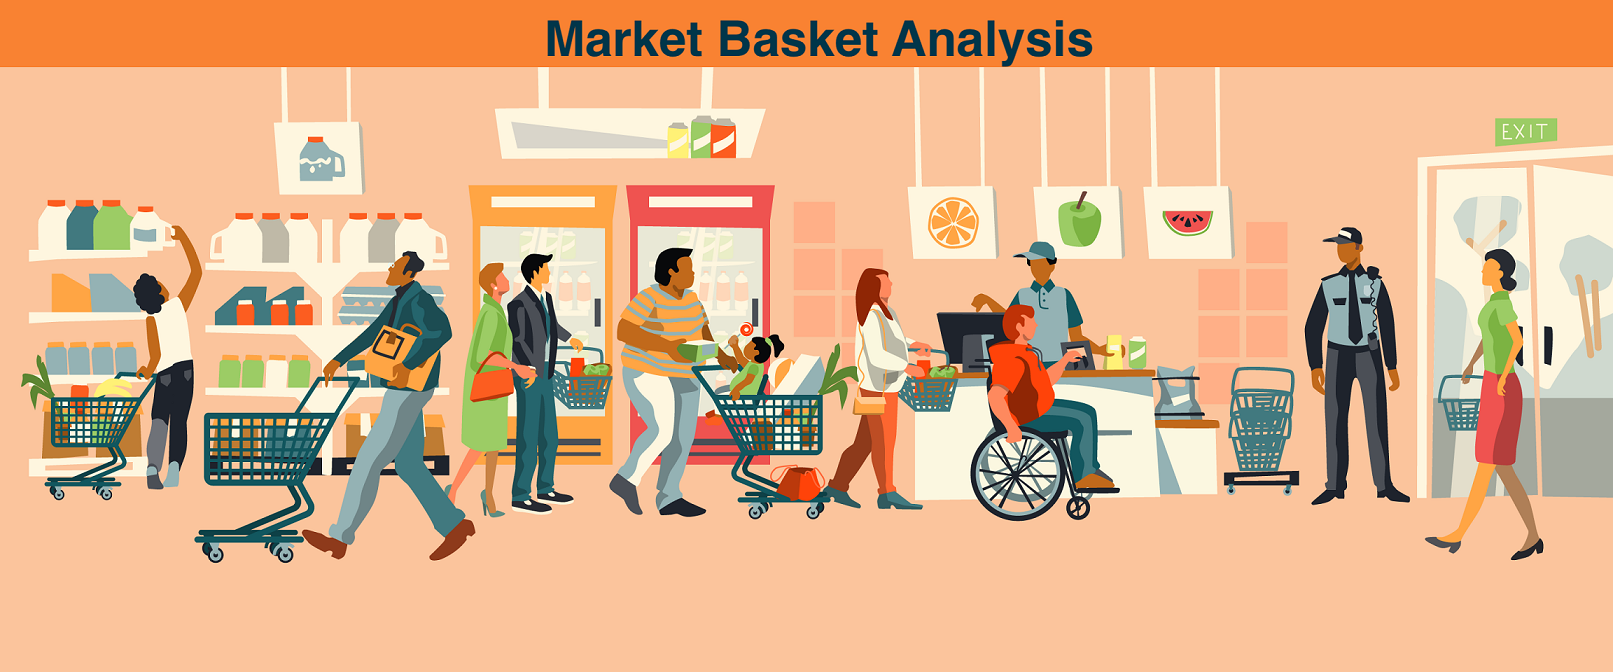

* **Market Basket Analysis** is a technique used to identify relationships between items in large datasets of customer transactions.  
  It is a valuable tool in data mining and machine learning, widely applied in retail and e-commerce.  
  The goal is to discover which items are frequently purchased together in a transaction, helping to improve sales and customer loyalty.

##  Apriori Algorithm

Market basket analysis is typically implemented using `association rule learning`, which is a technique for discovering interesting relationships between variables in a dataset. One of the most popular algorithms for association rule learning is the `Apriori algorithm`, which is used to identify frequent item sets and generate association rules. These rules are evaluated using measures such as support, confidence, and lift, which are used to determine the strength of the association between items.

For example, consider a dataset of customer purchases from a grocery store. An association rule might be "If a customer buys bread, they are likely to also buy butter."

The `Evaluation metric` used to evaluate the strength of the association between items are: 

* **Support**: It is a measure of the frequency of an itemset in the dataset. Mathematically, it is calculated as follows:

$$
\text{support}(I) = \frac{\text{number of transactions containing itemset } I}{\text{total number of transactions}}
$$

* **Confidence**: It tells us how often the items a and b occur given that a is bought. It is a measure of the reliability of an association rule. Mathematically, it is calculated as follows:

$$
confidence(X \rightarrow Y) = \frac{support(X \cup Y)}{support(X)}
$$


* **Lift**: It is a measure of the strength of an association rule. Mathematically, it is calculated as follows:

$$
lift(X \rightarrow Y) = \frac{confidence(X \rightarrow Y)}{support(Y)}
$$

    where X and Y are the *antecedent* and *consequent* of the rule, respectively.

## Import Libraries

In [14]:
import pandas as pd 
from mlxtend.frequent_patterns import apriori, association_rules 

##  Read the data, encode the data 

In [15]:
transactions = [
                ['eggs', 'milk','bread'],
                ['eggs', 'apple'],
                ['milk', 'bread'],
                ['apple', 'milk'],
                ['milk', 'apple', 'bread']
               ] 

In [16]:
from mlxtend.preprocessing import TransactionEncoder 

### TransactionEncoder
- Converts a list of transactions into a one-hot encoded boolean array
- `te.fit(transactions)`: Scans all transactions, extracts unique items, and sorts them
- Stored internally as `te.columns_ = ['apple', 'bread', 'eggs', 'milk']`
- `te_array`: Contains the boolean values

In [17]:
te=TransactionEncoder()
te_array=te.fit(transactions).transform(transactions)
df=pd.DataFrame(te_array, columns=te.columns_)
df 

,apple,bread,eggs,milk
0,False,True,True,True
1,True,False,True,False
2,False,True,False,True
3,True,False,False,True
4,True,True,False,True


In [18]:
print(te_array)

[[False  True  True  True]
 [ True False  True False]
 [False  True False  True]
 [ True False False  True]
 [ True  True False  True]]


In [19]:
print(te.columns_)

['apple', 'bread', 'eggs', 'milk']


###  Find the frequent itemsets 

In [23]:
freq_items = apriori(df, min_support = 0.5, use_colnames = True) 
print(freq_items) 

   support       itemsets
0      0.6        (apple)
1      0.6        (bread)
2      0.8         (milk)
3      0.6  (bread, milk)


### min_support = 0.5
 - Itemset must appear in at least 50% of transactions
 - 0.5 × 5 = 2.5 → minimum 3 transactions
 - use_colnames = True
 - Show item names instead of column indices

### 1-Itemsets 
-- Support = (count of transactions containing item) / 5 
- Item Count Support 
- apple 3 3/5 = 0.6 ✅ 
- bread 3 3/5 = 0.6 ✅ 
- eggs 2 2/5 = 0.4 ❌ 
- milk 4 4/5 = 0.8 ✅

### Frequent 1-itemsets: {apple}  {bread} {milk}

### 2-Itemsets (generated from frequent 1-itemsets)
- Itemset	Count	Support
- {apple, bread}	1	1/5 = 0.2 ❌
- {apple, milk}	2	2/5 = 0.4 ❌
- {bread, milk}	3	3/5 = 0.6 ✅

### Frequent 2-itemsets:  {bread, milk}

### 3-Itemsets

- Only possible candidate:

- {apple, bread, milk} → appears once → support = 0.2 ❌

- ❌ No frequent 3-itemsets

### Generate the association rules that have a support value of at least 5% 

In [25]:
rules = association_rules(freq_items, metric ='support', min_threshold=0.05 ) 
rules = rules.sort_values(['support', 'confidence'], ascending =[False,False]) 
print(rules)

  antecedents consequents  antecedent support  consequent support  support  \
0     (bread)      (milk)                 0.6                 0.8      0.6   
1      (milk)     (bread)                 0.8                 0.6      0.6   

   confidence  lift  representativity  leverage  conviction  zhangs_metric  \
0        1.00  1.25               1.0      0.12         inf            0.5   
1        0.75  1.25               1.0      0.12         1.6            1.0   

   jaccard  certainty  kulczynski  
0     0.75      1.000       0.875  
1     0.75      0.375       0.875  


## Lab Assignments- SET-A

### Create the following dataset in python 
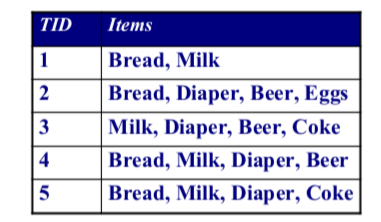 
### Convert the categorical values into numeric format

In [11]:
import pandas as pd 
from mlxtend.preprocessing import TransactionEncoder 
from mlxtend.frequent_patterns import apriori, association_rules 

In [12]:
dataset = [
                ['Bread', 'Milk'],
                ['Bread', 'Diaper', 'Beer','Eggs'],
                ['Milk', 'Diaper', 'Beer','Coke'],
                ['Bread', 'Milk', 'Diaper', 'Beer'],
                ['Bread', 'Milk', 'Diaper', 'Coke']
               ] 

In [13]:
te1 = TransactionEncoder()

In [14]:
te1_array = te1.fit(dataset).transform(dataset)
te1_array

array([[False,  True, False, False, False,  True],
       [ True,  True, False,  True,  True, False],
       [ True, False,  True,  True, False,  True],
       [ True,  True, False,  True, False,  True],
       [False,  True,  True,  True, False,  True]])

In [15]:
setadf = pd.DataFrame(te1_array, columns=te1.columns_)

In [16]:
setadf

,Beer,Bread,Coke,Diaper,Eggs,Milk
0,False,True,False,False,False,True
1,True,True,False,True,True,False
2,True,False,True,True,False,True
3,True,True,False,True,False,True
4,False,True,True,True,False,True


In [17]:
freq_items1 = apriori(setadf, min_support = 0.5, use_colnames = True) 
print(freq_items1) 

   support         itemsets
0      0.6           (Beer)
1      0.8          (Bread)
2      0.8         (Diaper)
3      0.8           (Milk)
4      0.6   (Diaper, Beer)
5      0.6  (Diaper, Bread)
6      0.6    (Bread, Milk)
7      0.6   (Diaper, Milk)


In [18]:
rules1 = association_rules(freq_items1, metric ='support', min_threshold=0.05 ) 
rules1 = rules1.sort_values(['support', 'confidence'], ascending =[False,False]) 
print(rules1)

  antecedents consequents  antecedent support  consequent support  support  \
1      (Beer)    (Diaper)                 0.6                 0.8      0.6   
0    (Diaper)      (Beer)                 0.8                 0.6      0.6   
2    (Diaper)     (Bread)                 0.8                 0.8      0.6   
3     (Bread)    (Diaper)                 0.8                 0.8      0.6   
4     (Bread)      (Milk)                 0.8                 0.8      0.6   
5      (Milk)     (Bread)                 0.8                 0.8      0.6   
6    (Diaper)      (Milk)                 0.8                 0.8      0.6   
7      (Milk)    (Diaper)                 0.8                 0.8      0.6   

   confidence    lift  representativity  leverage  conviction  zhangs_metric  \
1        1.00  1.2500               1.0      0.12         inf           0.50   
0        0.75  1.2500               1.0      0.12         1.6           1.00   
2        0.75  0.9375               1.0     -0.04        